# AB Testing Lifecycle

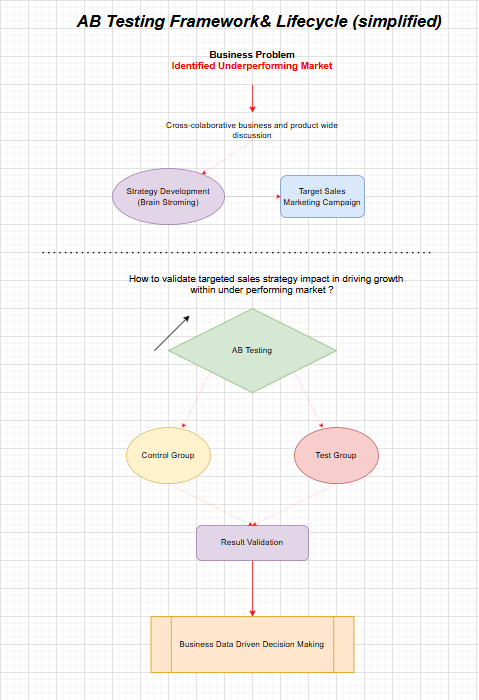

### T-tests

Used to compare the means of one or two groups. 
- One-sample t-test: Compares the mean of a single sample to a known or hypothesized population mean.   
- Independent (two-sample) t-test: Compares the means of two independent groups.   
- Paired (dependent) t-test: Compares the means of two related groups (e.g., before and after measurements on the same subjects).   



Hypothesis Testing
- Null Hypothesis (H0): The means of all groups are equal. (e.g., μ1 = μ2 = μ3 = ... = μk)
- Alternative Hypothesis (Ha): At least one group mean is different from the others.

In [ ]:
import numpy as np # numerical python
import pandas as pd # 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Background Testing

The t-test is a simple statistical test that helps you figure out if the average (mean) of two groups is truly different from each other, or if the difference you see is just due to random chance.

Think of it like this:

Imagine you have two classes of students and you want to know if their average test scores are different.

- What the t-test does: It looks at the average score of each class and how spread out the scores are within each class.
- The goal: To determine if the difference in the average scores is large enough to say that the two classes are genuinely different in their performance, and not just because of some random high or low
scores in either class.

Key things to know:

- Two Groups: You always need two groups to compare with a t-test.
- Average (Mean): The test focuses on the average value of whatever you're measuring.
- Spread (Variance): It also considers how much the individual values in each group vary. If the scores within a class are very spread out, it's harder to say if a small difference in averages is meaningful.
- Statistical Significance: The t-test gives you a "p-value," which tells you the probability of seeing the difference you observed (or even a bigger difference) if there was actually no real difference between the groups. If this p-value is small enough (usually below 0.05), you can say the difference is "statistically significant," meaning it's unlikely to be just random chance.
In simple terms, the t-test helps you decide if the difference between the averages of two groups is likely a real difference or just a fluke.

In [ ]:
# Sample data for two independent groups
price_group_1 = np.array([20, 22, 25, 23, 21])
price_group_2 = np.array([25, 28, 26, 30, 27])

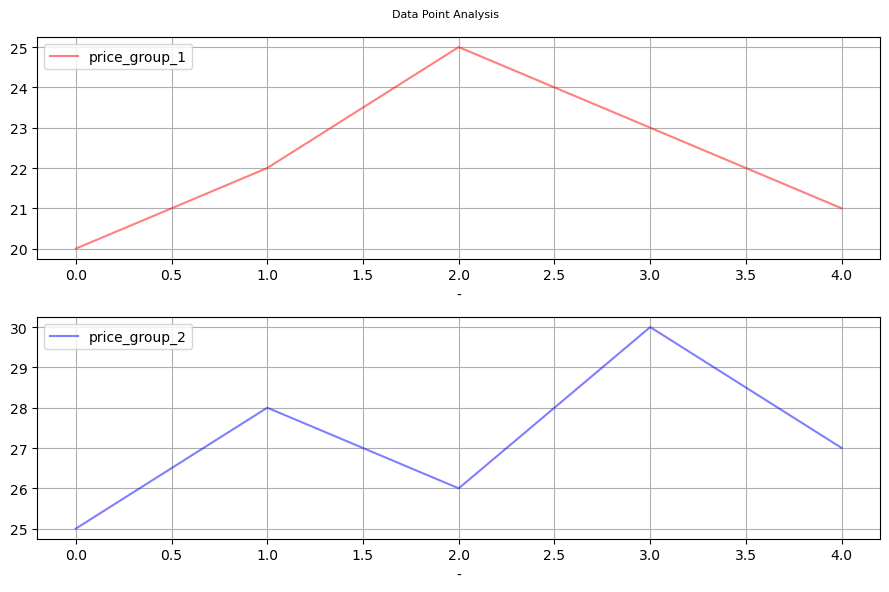

In [ ]:
# (Subplots) ----- Sharing Y-AXIS
fig, ax = plt.subplots(2, figsize = (9,6), sharey= False)
fig.suptitle('Data Point Analysis', fontsize = 8)

#
ax[0].plot(price_group_1,color='red',label='price_group_1',alpha=0.5)
ax[1].plot(price_group_2,color='blue',label='price_group_2',alpha=0.5)

# set x & y labels
ax[0].set_xlabel('-')
ax[1].set_xlabel('-')
ax[0].legend(loc=2) 
ax[1].legend(loc=2) 

# Iterate through all axes and enable grid
for i in ax.flat:
    i.grid(True)

fig.tight_layout()
plt.show()

Interpreting the Results: The primary output of a t-test is the t-statistic and the p-value.

- T-statistic: A calculated value that represents the difference between the sample means relative to the variability within the samples. A larger absolute t-value generally indicates a greater difference between the means.
- P-value: The probability of observing a test statistic as extreme as, or more extreme than, the one calculated from the sample data, assuming the null hypothesis is true. 


- A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, leading to its rejection. This suggests that the difference between the group means is statistically significant.   
- A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so we fail to reject it. This suggests that the observed difference between the group means could be due to random chance.


In [ ]:
# Perform independent samples t-test (assuming equal variances)
t_statistic, p_value = stats.ttest_ind(price_group_1, price_group_2)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Means of the two groups are significantly different.")
else:
    print("Fail to reject null hypothesis: No significant difference between the means of the two groups.")

# Perform Welch's t-test (assuming unequal variances)
t_statistic_welch, p_value_welch = stats.ttest_ind(price_group_1, price_group_2, equal_var=False)

print("\nWelch's T-statistic:", t_statistic_welch)
print("Welch's P-value:", p_value_welch)

if p_value_welch < alpha:
    print("Reject null hypothesis: Means of the two groups are significantly different.")
else:
    print("Fail to reject null hypothesis: No significant difference between the means of the two groups.")

T-statistic: -4.109974682633932
P-value: 0.003390752893006028
Reject null hypothesis: Means of the two groups are significantly different.

Welch's T-statistic: -4.109974682633933
Welch's P-value: 0.003390752893006025
Reject null hypothesis: Means of the two groups are significantly different.
